In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
train=pd.read_csv('titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

# - Missing Data

In [12]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

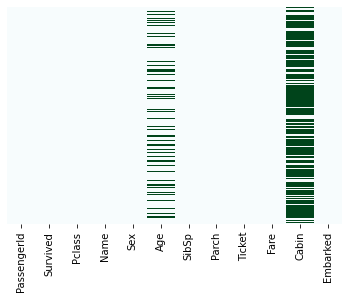

In [23]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False,cmap='BuGn')

<AxesSubplot:xlabel='Survived', ylabel='count'>

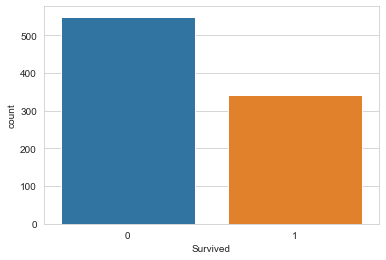

In [24]:
sns.set_style('whitegrid')
sns.countplot(data=train, x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

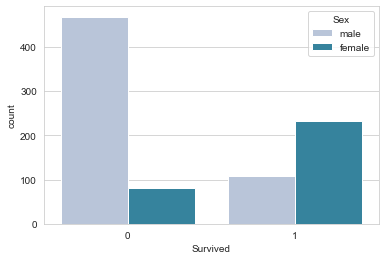

In [27]:
sns.set_style('whitegrid')
sns.countplot(data=train, x='Survived', hue='Sex', palette='PuBuGn')

<AxesSubplot:xlabel='Survived', ylabel='count'>

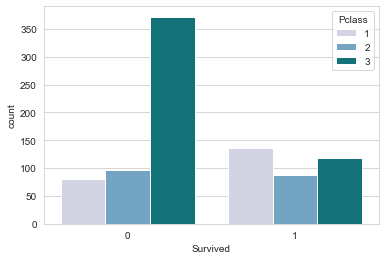

In [31]:
sns.set_style('whitegrid')
sns.countplot(data=train, x='Survived', hue='Pclass', palette='PuBuGn')

C:\Users\AWAIS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

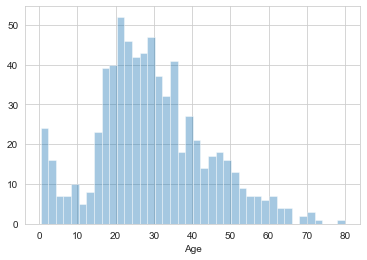

In [33]:
sns.distplot(train['Age'].dropna(), kde=False, bins=40)

<AxesSubplot:>

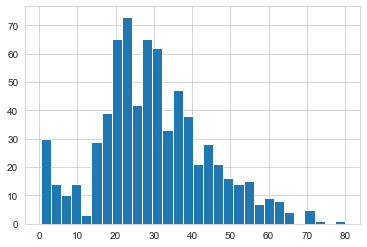

In [34]:
train['Age'].hist(bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

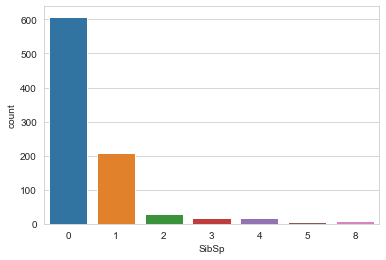

In [35]:
sns.countplot(data=train,x='SibSp')

<AxesSubplot:>

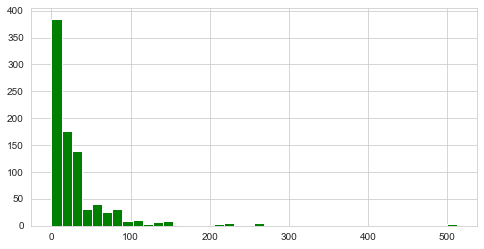

In [38]:
train['Fare'].hist(color='g', bins=40, figsize=(8,4))

# Data Cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

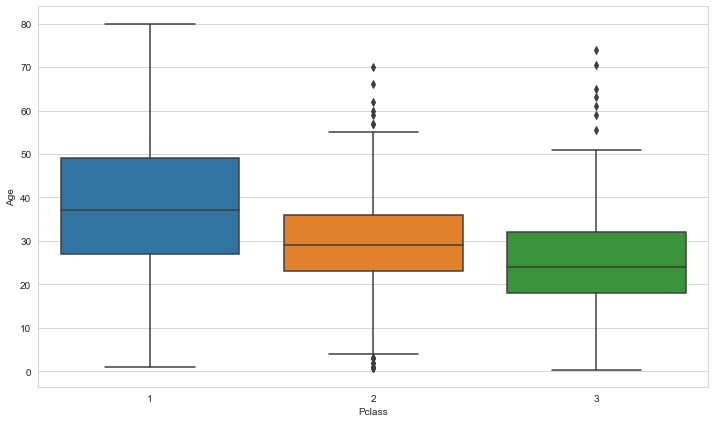

In [40]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age', data=train)

In [44]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [47]:
train['Age']=train[['Age', 'Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

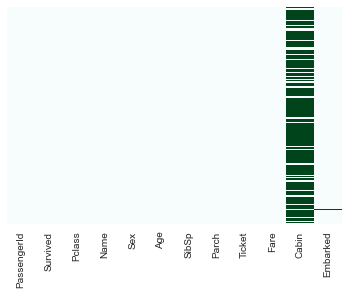

In [48]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False,cmap='BuGn')

In [52]:
train.drop('Cabin',axis=1, inplace=True)

In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

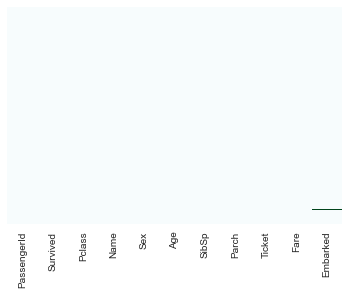

In [54]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False,cmap='BuGn')

# Converting Catagorical Features

In [56]:
embark=pd.get_dummies(train['Embarked'], drop_first=True)
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [57]:
train.drop(['PassengerId','Name','Sex','Ticket','Embarked'],axis=1, inplace=True)

In [58]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [59]:
train=pd.concat([train,embark,sex],axis=1)

In [60]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,0,3,22.0,1,0,7.2500,0,1,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,1


# Logistic Regression Model

In [84]:
X=train.drop('Survived', axis=1).head()
X

,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,3,22.0,1,0,7.2500,0,1,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,1,0
3,1,35.0,1,0,53.1000,0,1,0
4,3,35.0,0,0,8.0500,0,1,1


In [85]:
y=train['Survived'].head()
y

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)

# Training and Predicting

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [90]:
y_pred=logmodel.predict(X_test)

In [91]:
from sklearn.metrics import confusion_matrix   # confusion matrix used in classification

In [92]:
accuracy=confusion_matrix(y_test, y_pred)
accuracy

array([[0, 1],
       [0, 1]], dtype=int64)

In [94]:
from sklearn.metrics import accuracy_score

In [96]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.5

In [97]:
y_pred

array([1, 1], dtype=int64)